In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

/Users/bas/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/bas/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/bas/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/bas/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/bas/.pyenv/versions/3.7.6/lib/python3.7/importlib/_bootstrap.py:219: 

In [98]:
representation = 'centered'
meta = pd.read_csv(f'../data/subset-contours/contours-1000-metadata.csv', index_col=0)
df = pd.read_csv(f'../data/subset-contours/contours-1000-{representation}.csv', index_col=0)

In [99]:
kmeans = dict()
for k in range(2, 10):
    kmeans[k] = KMeans(n_clusters=k, random_state=0).fit(df.values)

In [100]:
def find_ordering(prev_clusters, cur_clusters):
    dm = distance_matrix(prev_clusters, cur_clusters)
    order = list(np.argmin(dm, axis=1))
    for i in range(dm.shape[1]):
        if i not in order:
            order.append(i)
    return order

In [101]:
find_ordering(kmeans[k-1].cluster_centers_, kmeans[k].cluster_centers_)

[7, 1, 5, 2, 3, 4, 0, 6, 8]

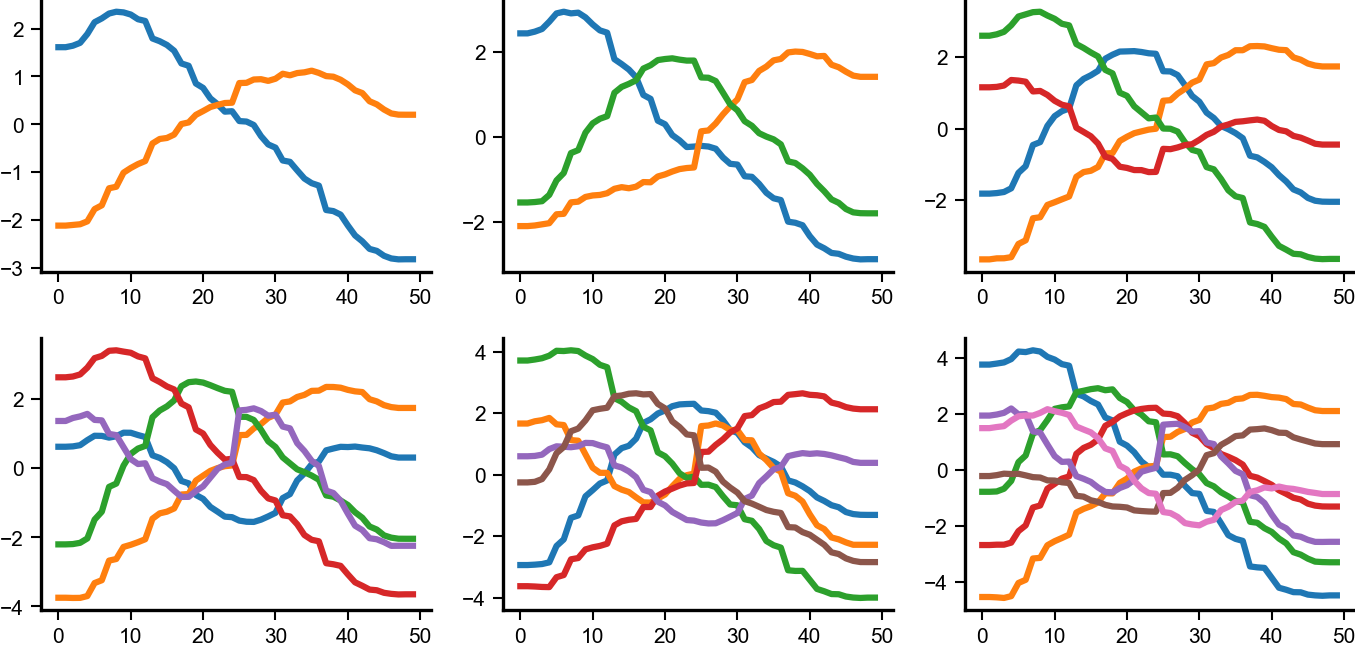

In [102]:
plt.figure(figsize=cm2inch(12,6))
plt.subplot(231)
plt.plot(kmeans[2].cluster_centers_.T)
for k in range(3, 8):
    plt.subplot(str(f'23{k-1}'))
    clusters = kmeans[k].cluster_centers_
    order = find_ordering(kmeans[k-1].cluster_centers_, clusters)
    plt.plot(clusters[order,:].T)

plt.tight_layout()

## Scatter plots

In [160]:
from sklearn.decomposition import PCA

In [104]:
subset_size = 1000
representation = 'smooth'
meta = pd.read_csv(f'../data/contours/contours-{subset_size}-metadata.csv', index_col=0)
smooth_df = pd.read_csv(f'../data/contours/contours-{subset_size}-{representation}.csv', index_col=0)
pca = PCA(n_components=2, random_state=12345, svd_solver='full')
pca.fit(smooth_df.values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=12345,
    svd_solver='full', tol=0.0, whiten=False)

In [114]:
x, y = pca.transform(df.values).T

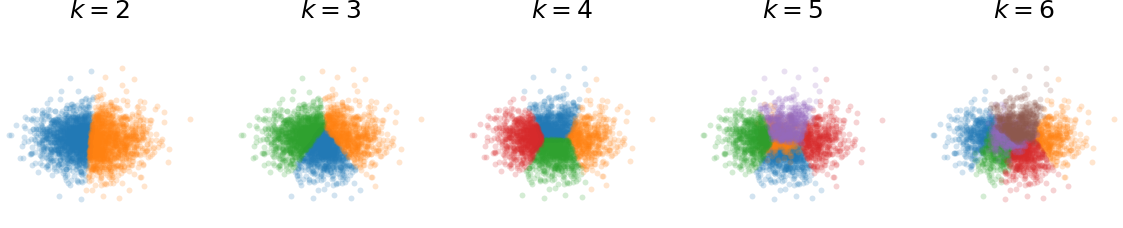

In [159]:
plt.figure(figsize=cm2inch(12,2.5))
my_cmap = ListedColormap(sns.color_palette().as_hex())

for k in range(2, 7):
    plt.subplot(int(f'16{k-1}'))
    for label in range(len(kmeans)):
        matches = kmeans[k].labels_ == label
        plt.scatter(x[matches], y[matches], s=2, alpha=.2, lw=0)
    plt.title(f'$k={k}$')
    plt.axis('equal')
    plt.axis('off')
    
plt.tight_layout()

## Combined

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


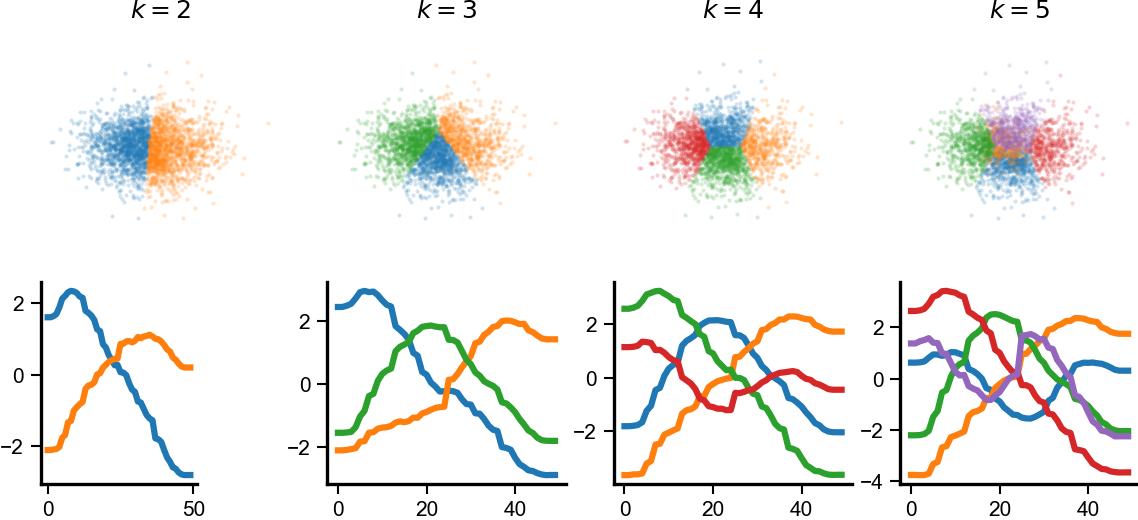

In [173]:
plt.figure(figsize=cm2inch(12,5))
my_cmap = ListedColormap(sns.color_palette().as_hex())

for k in range(2, 6):
    plt.subplot(int(f'24{k-1}'))
    for label in range(len(kmeans)):
        matches = kmeans[k].labels_ == label
        plt.scatter(x[matches], y[matches], s=1, alpha=.2, lw=0)
    plt.title(f'$k={k}$')
    plt.axis('equal')
    plt.axis('off')
    
plt.subplot(267)
plt.plot(kmeans[2].cluster_centers_.T)
for k in range(3, 6):
    plt.subplot(int(f'24{k+3}'))
    clusters = kmeans[k].cluster_centers_
    order = find_ordering(kmeans[k-1].cluster_centers_, clusters)
    plt.plot(clusters[order,:].T)
    
plt.tight_layout()

plt.savefig('../figures/fig-kmeans-results.pdf')